# Notebook 2 - Importance Sampling e Random Walk

Questa lezione introduce il concetto di Importance Sampling per il calcolo numerico di integrali e contiene la prima simulazione con metodi numerici di un esperimento: lo studio di un random walk e di alcune sue proprietà caratteristiche.

   - [  2.1 - Integrali con Importance Sampling ](#ex-2.1) 
   
   - [  2.2 - Simulazione di Random Walk ](#ex-2.2)
   

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

<a id="ex-2.1"></a>
## Esercizio 2.1. - Integrali con Importance Sampling
Il primo esercizio consiste nel calcolare il seguente integrale:

\begin{equation}
    I = \int_0^1 \frac{\pi}{2} \cos \left( \frac{\pi x}{2}\right) = 1
\end{equation}

Verrà utilizzato il metodo della media, come nella prima lezione, tuttavia sfruttando il metodo dell' <b> importance sampling </b>. Esso consiste nello scegliere i punti non con un campionamento uniforme in $[0, 1)$, ma scegliendo un'opportuna distribuzione di probabilità $p(x)$, che sia il più possibile simile all'integranda. Questo permetterà di campionare con maggiore densità le zone in cui la funzione è sensibilmente diversa da zero. La distribuzione $p(x)$ deve rispettare alcune condizioni; deve essere <b> positiva e limitata </b> nel dominio dove viene utilizzata, e <b> normalizzata </b>. Quest'ultimo punto non è strettamente necessario se viene utilizzato il metodo ibrido spiegato successivamente.
<br> Questo è stato fatto in due diversi modi:
- <b> Campionamento lineare </b>: Per il campionamento è stata utilizzata la distribuzione $p(x) = 2(1-x)$, che è normalizzata e integrabile. Per questo motivo per estrarre i punti secondo tale distribuzione è stato utilizzato il metodo di inversione della cumulativa, integrato nella classe `random.cc`
- <b> Campionamento parabolico </b>: Per quest'altro campionamento è stato utilizzato un metodo ibrido, per cui i punti sono stati estratti da una distribuzione di probabilità $g(x)$ con un vincolo aggiuntivo: $g(x) > p(x)$ nel dominio di utilizzo, ma che non richiede necessariamente di essere normalizzata. Per questo è stata utilizzata la distribuzione $g(x) = \frac{\pi}{2} (1-x^2)$, che è particolarmente vicina all'integranda, 

Il grafico mostra il paragone tra la funzione e le distribuzioni utilizzate.

<div style="text-align:center">
    <img src="desmos_graph.png" alt="Graph" width="400" height="400">
</div>

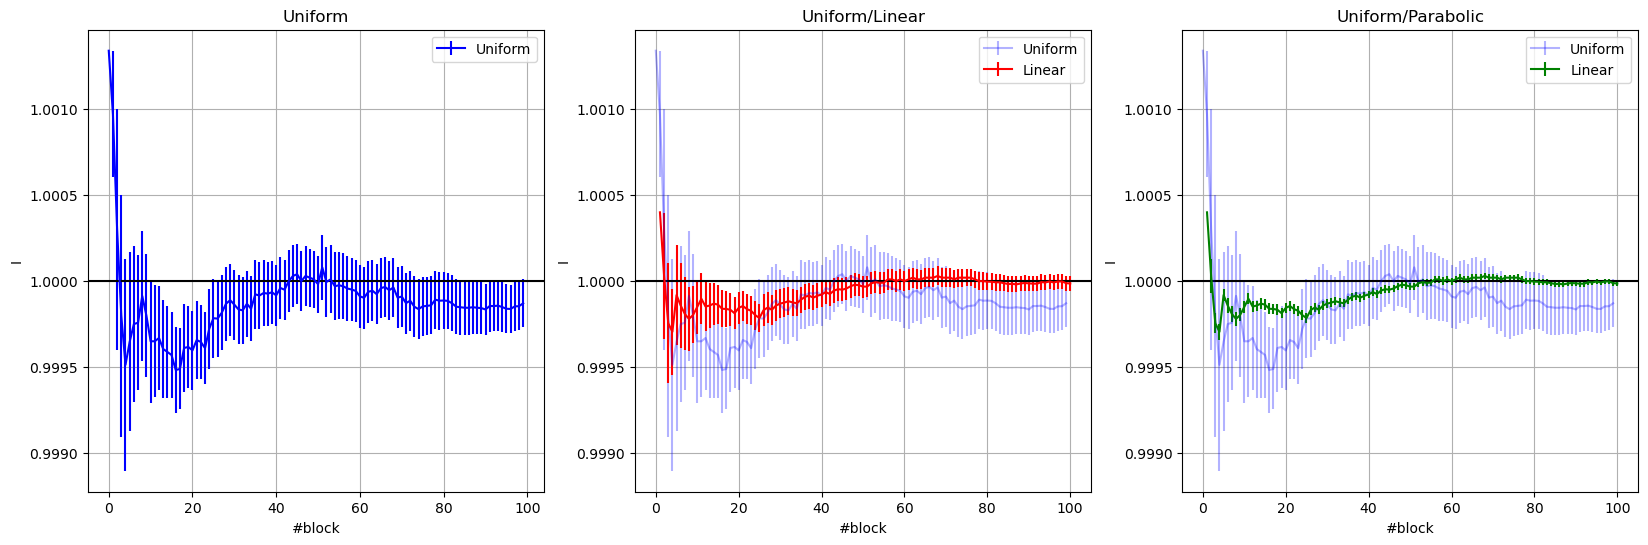

In [3]:
x_1,sum_prog_1, err_prog_1 = np.loadtxt("Exercise02-1/results/results_uniform.txt", usecols =(0,1,2), unpack = 'true')
x_2, sum_prog_2, err_prog_2 = np.loadtxt("Exercise02-1/results/results_linear.txt", usecols =(0,1,2), unpack = 'true')
x_3, sum_prog_3, err_prog_3 = np.loadtxt("Exercise02-1/results/results_parabolic.txt", usecols =(0,1,2), unpack = 'true')

fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Per mostrare fianco a fianco

axes[0].errorbar(x_1, sum_prog_1, err_prog_1, color='blue', label='Uniform')
axes[0].set_title('Uniform')
axes[0].axhline(y=1, color = 'black', linestyle = '-')
axes[0].set_ylabel("I")
axes[0].set_xlabel("#block")
axes[0].legend()
axes[0].grid(True)

axes[1].errorbar(x_1, sum_prog_1, err_prog_1, color='blue', label='Uniform', alpha = 0.3)
axes[1].errorbar(x_2, sum_prog_2, err_prog_2, color='red', label='Linear')
axes[1].set_title('Uniform/Linear')
axes[1].axhline(y=1, color = 'black', linestyle = '-')
axes[1].set_ylabel("I")
axes[1].set_xlabel("#block")
axes[1].legend()
axes[1].grid(True)

axes[2].errorbar(x_1, sum_prog_1, err_prog_1, color='blue', label='Uniform', alpha = 0.3)
axes[2].errorbar(x_3, sum_prog_3, err_prog_3, color='green', label='Linear')
axes[2].set_title('Uniform/Parabolic')
axes[2].axhline(y=1, color = 'black', linestyle = '-')
axes[2].set_ylabel("I")
axes[2].set_xlabel("#block")
axes[2].legend()
axes[2].grid(True)

plt.show()

Si nota che gli integrali calcolati con importance sampling hanno un errore sensibilmente minore rispetto a quelli calcolati con campionamento uniforme. L'errore diminuisce tanto più la distribuzione è simile all'integranda, come mostrato dal fatto che il campionamento parabolico abbia un errore minore rispetto al campionamento lineare. Questa differenza tuttavia non è rilevante quando quella tra campionamenti con importance sampling e uniformi.

### Antithetic Variates
Un altro metodo per ridurre la varianza di funzioni quasi-lineari è quello delle <b> antithetic </b> variates, ovvero utilizzare come stimatore:

\begin{equation}
    \int_0^1 g(x)dx = \lim_{N\to \infty} \frac{1}{N} \sum_{1}^{N} \frac{g(x)+g(1-x)}{2}
\end{equation}

Data l'efficacia della distribuzione lineare nel metodo precedente ho ritenuto che anche questa funzione potesse essere ritenuta quasi-lineare. Il grafico mostra i risultati ottenuti, in cui si nota che l'errore non varia sensibilmente rispetto al campionamento uniforme, anche se la convergenza al valore esatto è altrettanto rapida. <br> Dunque in questo caso il metodo delle anithetic variates, usato da solo, non comporta una riduzione della varianza, tuttavia va specificato che potrebbe essere utilizzato anche assieme all'importance sampling, ottenendo così sia una convergenza più rapida che una minore varianza. 

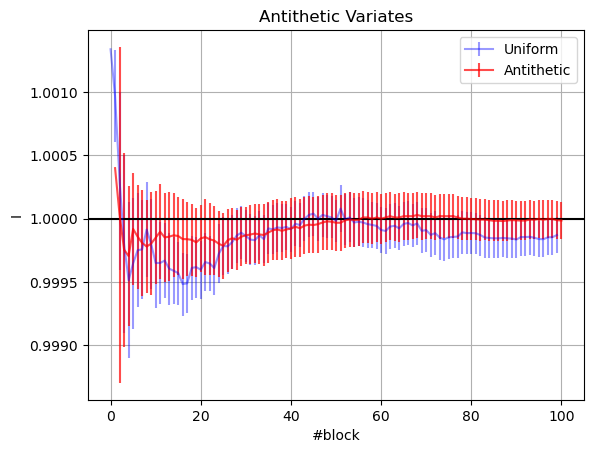

In [4]:
x_1,sum_prog_1, err_prog_1 = np.loadtxt("Exercise02-1/results/results_uniform.txt", usecols =(0,1,2), unpack = 'true')
x_2, sum_prog_2, err_prog_2 = np.loadtxt("Exercise02-1/results/results_antithetic.txt", usecols =(0,1,2), unpack = 'true')

plt.errorbar(x_1, sum_prog_1, err_prog_1, color='blue', label='Uniform', alpha = 0.4)
plt.errorbar(x_2, sum_prog_2, err_prog_2, color='red', label='Antithetic', alpha = 0.7)
plt.axhline(y=1, color = 'black', linestyle = '-')
plt.title("Antithetic Variates")
plt.ylabel("I")
plt.xlabel("#block")
plt.legend()
plt.grid(True)

<a id="ex-2.2"></a>
## Esercizio 2.2. - Random Walk

In questo esercizio si vuole simulare un random walk, ovvero una traiettoria composta da step successivi scelti in modo randomico. Questo step può essere:
- discreto, come nel caso di random walk su un lattice di spaziatura $a$. In questo processo ogni step ha lunghezza fissa e la casualità sta nella scelta dell'asse su cui giace il passo.
- continuo, in cui la lunghezza dello step è sempre fissata ma la direzione può essere una qualsiasi sulla sfera.
Sono state effettuate entrambe le simulazioni utilizzando il data blocking. Sono state fatte $10^4$ simulazioni, divise su $N=100$ blocchi, calcolando in ognuna il raggio quadratico medio $\sqrt{\langle r \rangle^2}$. <br>
Il processo di random walk costituisce un <b> processo di diffusione </b>, che segue la legge $f(N) = k \sqrt{N}$. Si è operato un fit per verificare questa dipendenza e determinarne la costante.

### Random Walk Discreto
Per simulare il random walk discreto si è utilizzata una classe `Walker`, i cui datamembri privati sono le coordinate cartesiane. Un metodo `DiscreteStep` operava il passo nel seguente modo:
- estrarre un intero tra 0,1,2 per selezionare la direzione $x, y$ o $z$
- estrarre un intero tra 0 e 1 per selezionare se fare il passo in avanti o indietro
- aggiornare la posizione del walker con un passo di lunghezza a nella direzione e verso scelta
Si forniscono i grafici del fit e una rappresentazione grafica di un random walk costituito da $100$ passi

[]

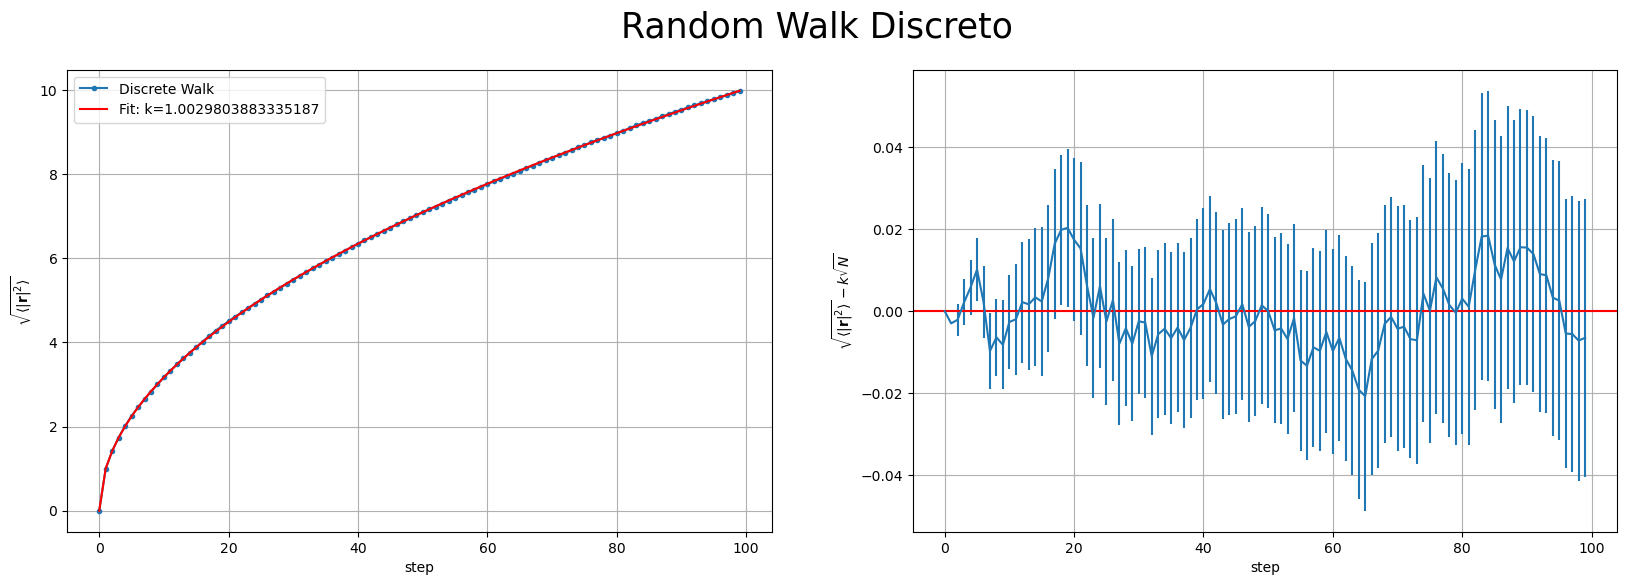

In [7]:
#Funzione per il fit
def f (x, k):
    return k * np.sqrt(x)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.suptitle("Random Walk Discreto", fontsize = 25)

step, dist = np.loadtxt("Exercise02-2/results/results_discrete.txt", usecols =(0,1), unpack = 'true')
axes[0].plot(step, dist, label='Discrete Walk', marker = '.')
axes[0].set_xlabel('step')
axes[0].set_ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}$')
#Fitting function
popt, pcov = curve_fit(f, step, dist)
axes[0].plot(step,f(step,*popt), color='red', label='Fit: k='+str(*popt))
axes[0].legend()
axes[0].grid(True)

step, dist, err = np.loadtxt("Exercise02-2/results/results_discrete.txt", usecols =(0,1,2), unpack = 'true')
axes[1].errorbar(step, dist - f(step,*popt), yerr = err)
axes[1].set_xlabel('step')
axes[1].set_ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle} - k \sqrt{N}$')
axes[1].axhline(y=0, color = 'r', linestyle = '-')
axes[1].grid(True)

plt.plot()

### Random Walk Continuo
Per il random walk continuo si è operato nella stessa maniera, ma è stato necessario campionare <b> uniformemente </b> la sfera. Questo problema viene discusso nella sezione successiva. È stato utilizzato ancora il data blocking.

[]

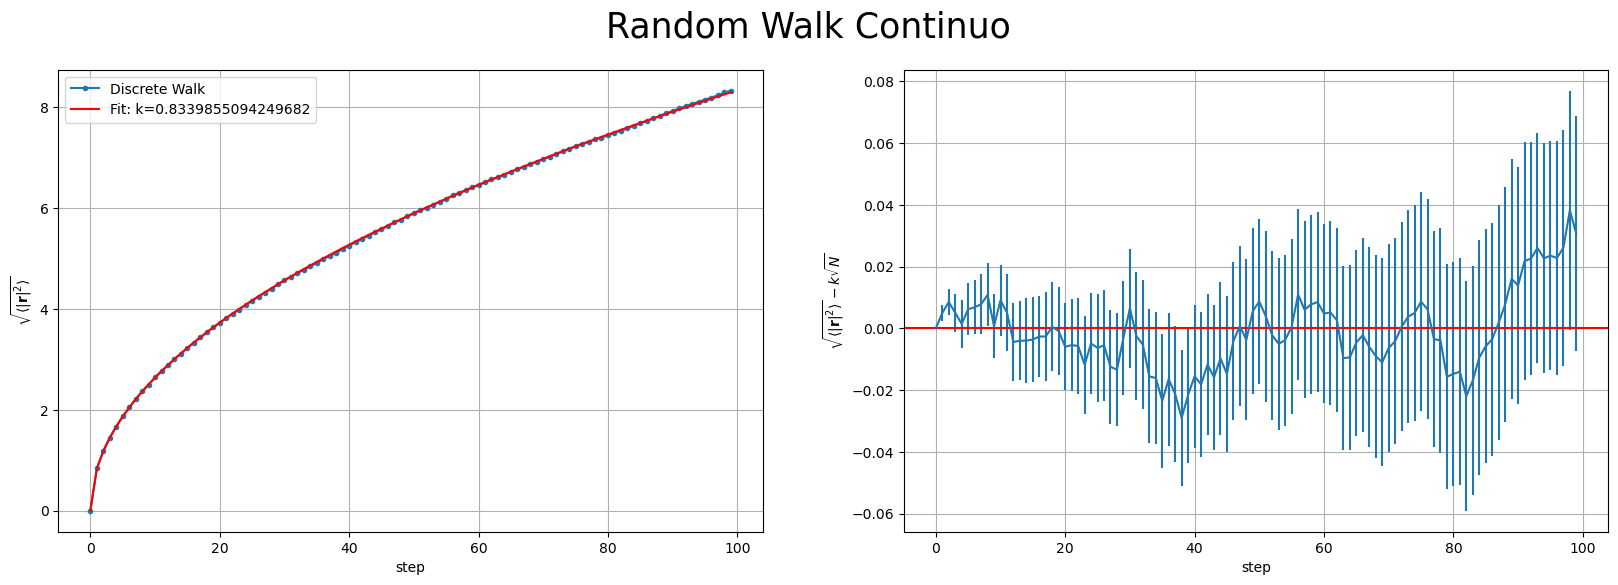

In [8]:
#Funzione per il fit
def f (x, k):
    return k * np.sqrt(x)

fig, axes = plt.subplots(1, 2, figsize=(20, 6))
plt.suptitle("Random Walk Continuo", fontsize = 25)

step, dist = np.loadtxt("Exercise02-2/results/results_continue.txt", usecols =(0,1), unpack = 'true')
axes[0].plot(step, dist, label='Discrete Walk', marker = '.')
axes[0].set_xlabel('step')
axes[0].set_ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}$')
#Fitting function
popt, pcov = curve_fit(f, step, dist)
axes[0].plot(step,f(step,*popt), color='red', label='Fit: k='+str(*popt))
axes[0].legend()
axes[0].grid(True)

step, dist, err = np.loadtxt("Exercise02-2/results/results_continue.txt", usecols =(0,1,2), unpack = 'true')
axes[1].errorbar(step, dist - f(step,*popt), yerr = err)
axes[1].set_xlabel('step')
axes[1].set_ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle} - k \sqrt{N}$')
axes[1].axhline(y=0, color = 'r', linestyle = '-')
axes[1].grid(True)

plt.plot()

### Campionamento Uniforme della Sfera
Per compiere il passo, è stato necessario scegliere un angolo lungo il quale compierlo. <br>
Il problema non è banale, in quanto il campionamento più "intuitivo", compiuto scegliendo $\theta \in [ 0, \pi]$ e $\varphi \in [ 0, 2 \pi]$ non è uniforme, come viene mostrato nei grafici sottostanti esso tende a favorire i poli rispetto all'equatore.
Per questo si è utilizzato un campionamento che ricalca quello dell' `Esercizio 1.3`, scegliendo punti distribuiti uniformemente all'interno di un cubo. Questi punti vengono rigettati se giacenti fuori dalla sfera unitaria, e proiettati sulla superficie se invece giacciono al'interno.
Si fornisce una rappresentazione grafica dei due campionamenti, quello uniforme e quello non uniforme, per evidenziarne la differenza, anche se solo a livello visivo.                                                                                 

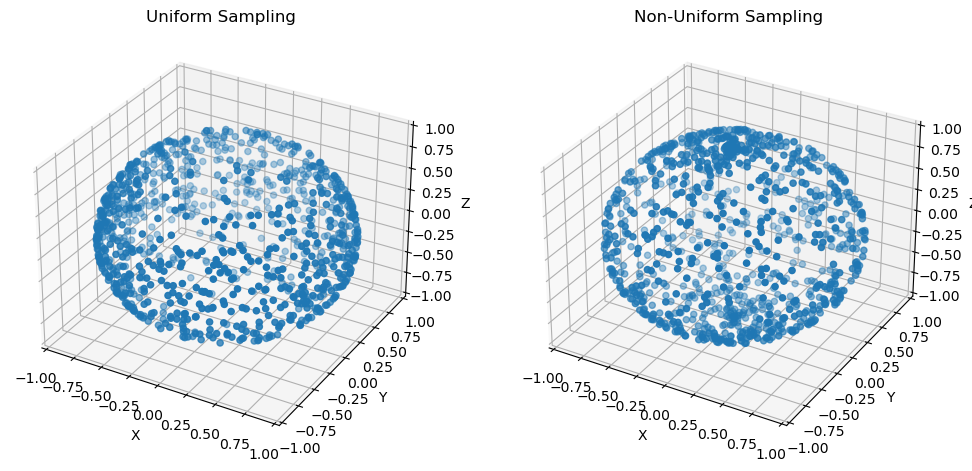

In [10]:
theta, phi = np.loadtxt("Exercise02-2/results/angle3d_distribution.txt", usecols=(0, 1), unpack=True)
theta2, phi2 = np.loadtxt("Exercise02-2/results/angle3d_distribution.txt", usecols=(2, 3), unpack=True)

x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

x2 = np.sin(theta2) * np.cos(phi2)
y2 = np.sin(theta2) * np.sin(phi2)
z2 = np.cos(theta2)

fig, (ax1, ax2) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(12, 6))

ax1.scatter(x, y, z)
ax1.set_title('Uniform Sampling')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax1.set_zlim([-1, 1])

ax2.scatter(x2, y2, z2)
ax2.set_title('Non-Uniform Sampling')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])

plt.show()

### Esempio di Random Walker
I due seguenti grafici rappresentano un esempio di random walk discreto e continuo con $N=50$ passi

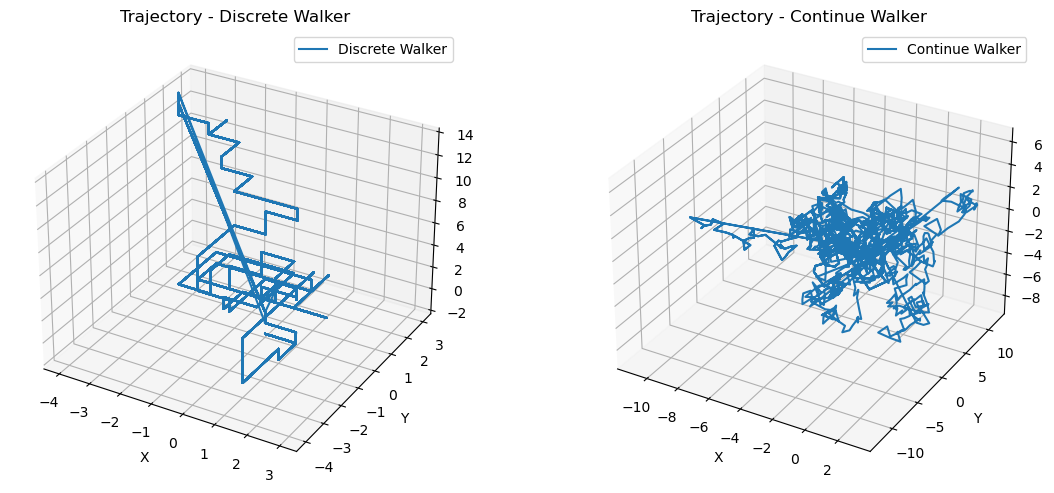

In [11]:
with open("Exercise02-2/results/discrete_walk.txt", 'r') as file:
    lines = file.readlines()
    data1 = [list(map(float, line.strip().split())) for line in lines]

with open("Exercise02-2/results/continue_walk.txt", 'r') as file:
    lines = file.readlines()
    data2 = [list(map(float, line.strip().split())) for line in lines]
    
x1, y1, z1 = zip(*data1)
x2, y2, z2 = zip(*data2)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.plot(x1, y1, z1, label='Discrete Walker')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Trajectory - Discrete Walker')
ax1.legend()

ax2.plot(x2, y2, z2, label='Continue Walker')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Trajectory - Continue Walker')
ax2.legend()

plt.tight_layout()
plt.show()
